# Data Exploration of CPE

* Function that opens a session using the Bolt protocol to send queries and retrieve responses.

In [45]:
from neo4j import GraphDatabase
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

uri = "bolt://localhost:7687"       
username = "neo4j"
password = "abcd90909090"

driver = GraphDatabase.driver(uri, auth=(username, password))

def run_query(query, parameters=None):
    with driver.session() as session:
        result = session.run(query, parameters)
        return [record.data() for record in result]

- Properties of CPE

In [46]:
query = """
MATCH (c:UcoexCPE)
RETURN c AS CPE LIMIT 10
"""
params = {}

records = run_query(query, parameters=params)

df = pd.DataFrame(records)

df

,CPE
0,{'uri': 'http://example.com/ucoex#cpe%3A2.3%3A...
1,{'uri': 'http://example.com/ucoex#cpe%3A2.3%3A...
2,{'uri': 'http://example.com/ucoex#cpe%3A2.3%3A...
3,{'uri': 'http://example.com/ucoex#cpe%3A2.3%3A...
4,{'uri': 'http://example.com/ucoex#cpe%3A2.3%3A...
5,{'uri': 'http://example.com/ucoex#cpe%3A2.3%3A...
6,{'uri': 'http://example.com/ucoex#cpe%3A2.3%3A...
7,{'uri': 'http://example.com/ucoex#cpe%3A2.3%3A...
8,{'uri': 'http://example.com/ucoex#cpe%3A2.3%3A...
9,{'uri': 'http://example.com/ucoex#cpe%3A2.3%3A...


* Distribution of all relationships regarding UcoexCPE

In [47]:
query = """
MATCH (c:UcoexCPE)-[r]-(target)
RETURN labels(c), type(r) AS Relationship LIMIT 10
"""
params = {}

records = run_query(query, parameters=params)

df = pd.DataFrame(records)

df

,labels(c),Relationship
0,"[Resource, UcoexCPE]",UCOEXHASCPE
1,"[Resource, UcoexCPE]",UCOEXHASCPE
2,"[Resource, UcoexCPE]",UCOEXHASCPE
3,"[Resource, UcoexCPE]",UCOEXHASCPE
4,"[Resource, UcoexCPE]",UCOEXHASCPE
5,"[Resource, UcoexCPE]",UCOEXHASCPE
6,"[Resource, UcoexCPE]",UCOEXHASCPE
7,"[Resource, UcoexCPE]",UCOEXHASCPE
8,"[Resource, UcoexCPE]",UCOEXHASCPE
9,"[Resource, UcoexCPE]",UCOEXHASCPE


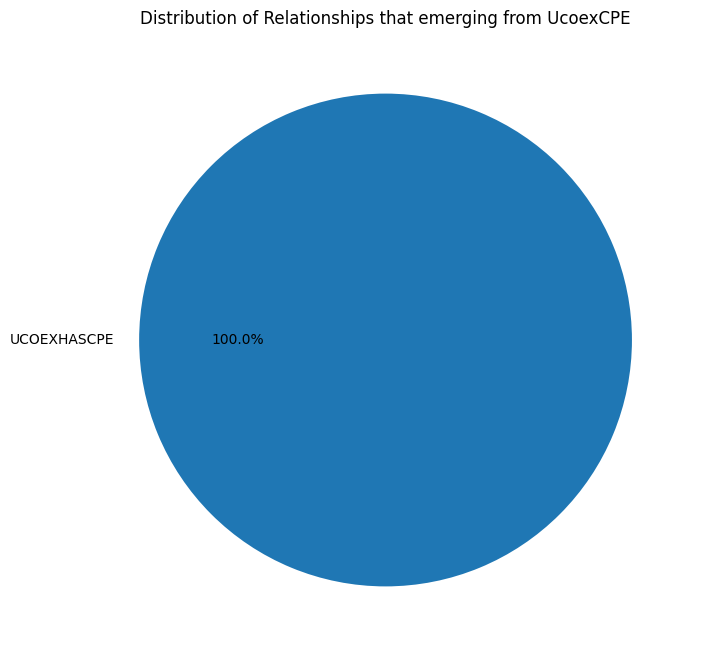

In [48]:
ax = df['Relationship'].value_counts().plot(kind = 'pie', autopct='%1.1f%%', labeldistance=1.1, figsize=(8,8))
ax.set_ylabel('')
plt.title('Distribution of Relationships that emerging from UcoexCPE')
plt.show()

* Distribution of nodes that has UCOEXHASCPE relationship

In [49]:
query = """
MATCH (c)-[r:UCOEXHASCPE]-(target)
RETURN labels(c), type(r) AS Relationship, target
"""
params = {}

records = run_query(query, parameters=params)

df = pd.DataFrame(records)

df

,labels(c),Relationship,target
0,"[Resource, UcoexCPE]",UCOEXHASCPE,{'uri': 'http://purl.org/cyber/uco#CVE-2011-19...
1,"[Resource, UcoexCPE]",UCOEXHASCPE,{'uri': 'http://purl.org/cyber/uco#CVE-2010-25...
2,"[Resource, UcoexCPE]",UCOEXHASCPE,{'uri': 'http://purl.org/cyber/uco#CVE-2009-27...
3,"[Resource, UcoexCPE]",UCOEXHASCPE,{'uri': 'http://purl.org/cyber/uco#CVE-2007-43...
4,"[Resource, UcoexCPE]",UCOEXHASCPE,{'uri': 'http://purl.org/cyber/uco#CVE-2006-52...
...,...,...,...
140371,"[Resource, UcoCVE]",UCOEXHASCPE,{'uri': 'http://example.com/ucoex#cpe%3A2.3%3A...
140372,"[Resource, UcoCVE]",UCOEXHASCPE,{'uri': 'http://example.com/ucoex#cpe%3A2.3%3A...
140373,"[Resource, UcoCVE]",UCOEXHASCPE,{'uri': 'http://example.com/ucoex#cpe%3A2.3%3A...
140374,"[Resource, UcoCVE]",UCOEXHASCPE,{'uri': 'http://example.com/ucoex#cpe%3A2.3%3A...


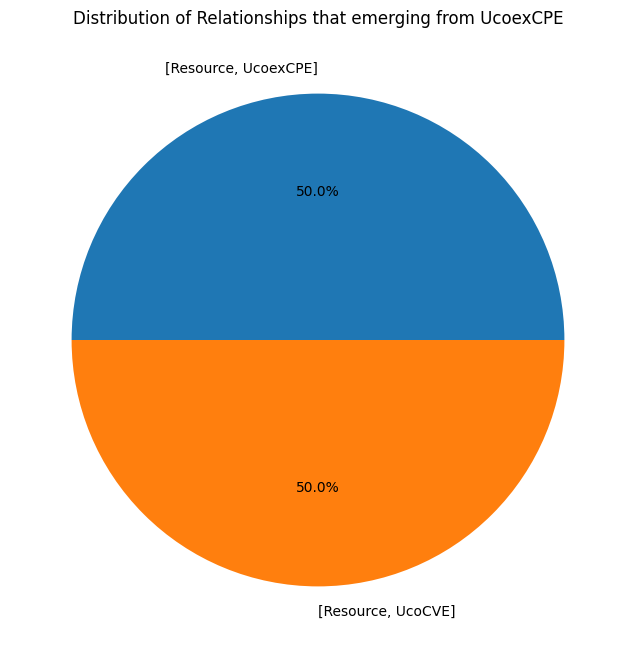

In [50]:
ax = df['labels(c)'].value_counts().plot(kind = 'pie', autopct='%1.1f%%', labeldistance=1.1, figsize=(8,8))
ax.set_ylabel('')
plt.title('Distribution of Relationships that emerging from UcoexCPE')
plt.show()

In [63]:
query = """
MATCH p = (c)-[r:UCOEXHASCPE]-(t)
RETURN p
"""
params = {}

records = run_query(query, parameters=params)

df = pd.DataFrame(records)

df

,p
0,[{'uri': 'http://example.com/ucoex#cpe%3A2.3%3...
1,[{'uri': 'http://example.com/ucoex#cpe%3A2.3%3...
2,[{'uri': 'http://example.com/ucoex#cpe%3A2.3%3...
3,[{'uri': 'http://example.com/ucoex#cpe%3A2.3%3...
4,[{'uri': 'http://example.com/ucoex#cpe%3A2.3%3...
...,...
155955,[{'uri': 'http://example.com/ucoex#cpe%3A2.3%3...
155956,[{'uri': 'http://example.com/ucoex#cpe%3A2.3%3...
155957,[{'uri': 'http://example.com/ucoex#cpe%3A2.3%3...
155958,[{'uri': 'http://example.com/ucoex#cpe%3A2.3%3...


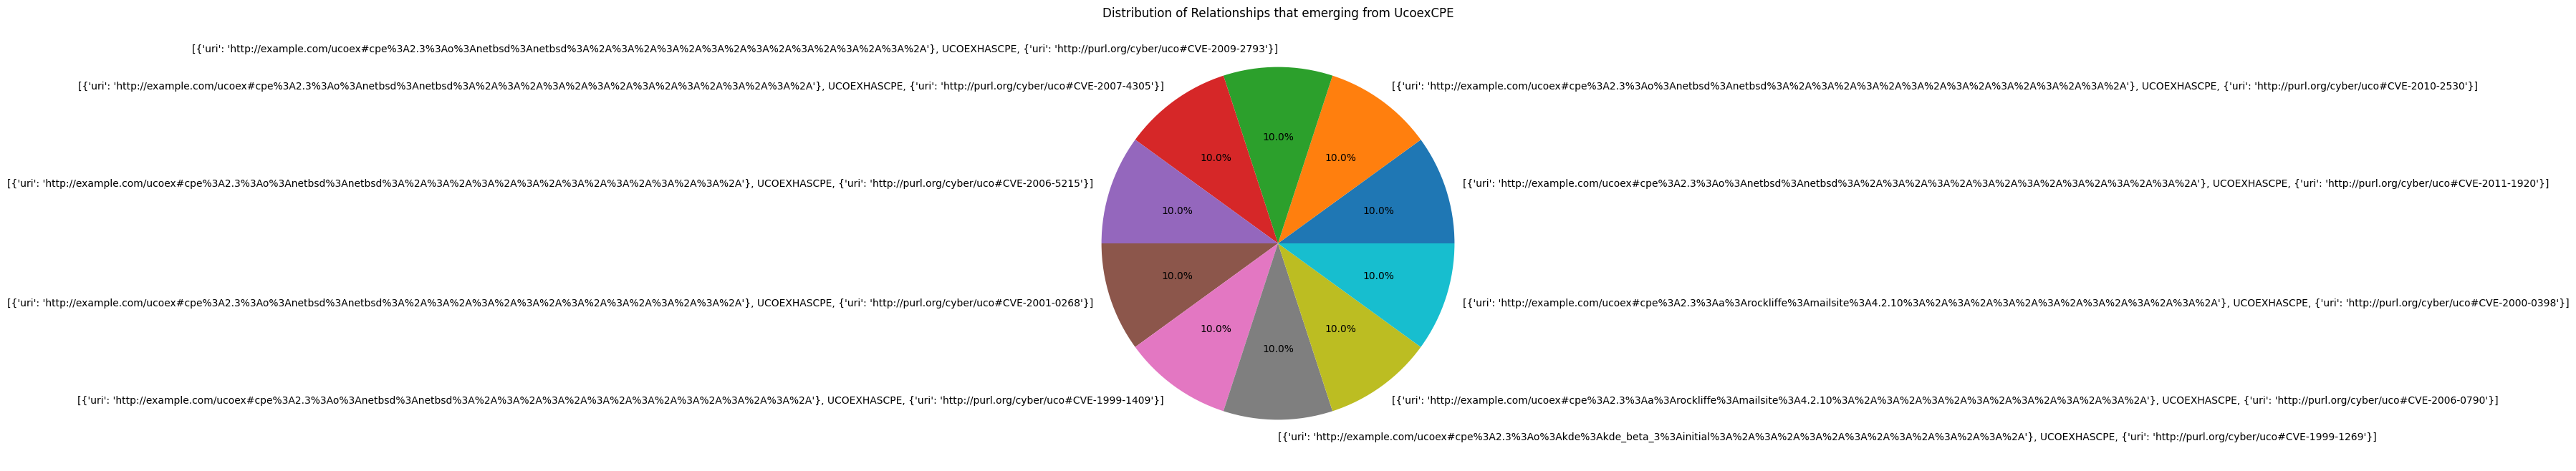

In [58]:
ax = df['p'].value_counts().plot(kind = 'pie', autopct='%1.1f%%', labeldistance=1.1, figsize=(8,8))
ax.set_ylabel('')
plt.title('Distribution of Relationships that emerging from UcoexCPE')
plt.show()